In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import trapezoid

# particula imports
from particula.next.dynamics.coagulation import brownian_kernel, rate
from particula.next.particles.properties.lognormal_size_distribution import (
    lognormal_pmf_distribution, lognormal_pdf_distribution
)
from particula.util.convert import distribution_convert_pdf_pms

## Create both a PDF and PMF


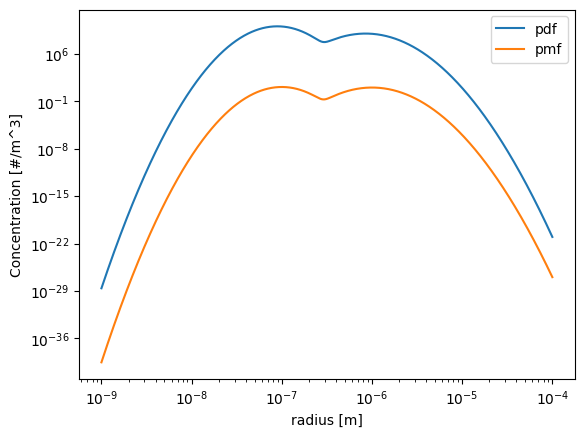

In [2]:
# Distribution parameters
mode = np.array([100e-9, 1e-6])
std = np.array([1.4, 1.5])
number = np.array([1e3, 1e3])
radius_bins = np.logspace(start=-9, stop=-4, num=1000)

# create the distribution
distribution_pdf = lognormal_pdf_distribution(
    x_values=radius_bins,
    mode=mode,
    geometric_standard_deviation=std,
    number_of_particles=number
)
distribution_pmf = lognormal_pmf_distribution(
    x_values=radius_bins,
    mode=mode,
    geometric_standard_deviation=std,
    number_of_particles=number
)

# Plot the distribution
plt.figure()
plt.plot(radius_bins, distribution_pdf, label='pdf')
plt.plot(radius_bins, distribution_pmf, label='pmf')
plt.xlabel('radius [m]')
plt.ylabel('Concentration [#/m^3]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

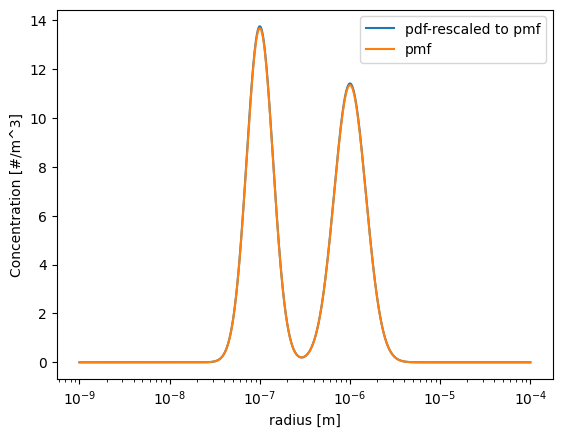

In [3]:
# rescale PDF to PMF
distribution_pdf_rescaled = distribution_convert_pdf_pms(
    x_array=radius_bins,
    distribution=distribution_pdf,
    to_pdf=False
)

# # Plot the distribution
plt.figure()
plt.plot(radius_bins, distribution_pdf_rescaled, label='pdf-rescaled to pmf')
plt.plot(radius_bins, distribution_pmf, label='pmf')
plt.xlabel('radius [m]')
plt.ylabel('Concentration [#/m^3]')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()


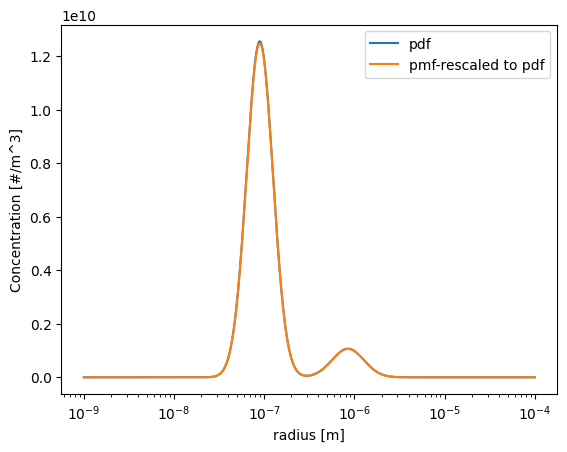

In [4]:
# pmf scaled to pdf
distribution_pmf_rescaled = distribution_convert_pdf_pms(
    x_array=radius_bins,
    distribution=distribution_pmf,
    to_pdf=True
)

plt.figure()
plt.plot(radius_bins, distribution_pdf, label='pdf')
plt.plot(radius_bins, distribution_pmf_rescaled, label='pmf-rescaled to pdf')
plt.xlabel('radius [m]')
plt.ylabel('Concentration [#/m^3]')
plt.xscale('log')
plt.legend()
plt.show()

In [5]:
# Check number concentration PDF integration
number_concentration_pdf = trapezoid(distribution_pdf, x=radius_bins)
number_concentration_pmf_rescaled = trapezoid(distribution_pmf_rescaled, x=radius_bins)

print(f'Number concentration PDF: {number_concentration_pdf}')
print(f'Number concentration PMF rescaled to PDF: {number_concentration_pmf_rescaled}')

# Check number concentration PMF integration
number_concentration_pmf = distribution_pmf.sum()
number_concentration_pdf_rescaled = distribution_pdf_rescaled.sum()

print(f'Number concentration PMF: {number_concentration_pmf}')
print(f'Number concentration PDF rescaled to PMF: {number_concentration_pdf_rescaled}')

Number concentration PDF: 1999.9999999999995
Number concentration PMF rescaled to PDF: 1988.5417021919575
Number concentration PMF: 2000.0000000000002
Number concentration PDF rescaled to PMF: 2011.5243223669002


In [6]:
# Get the kernel
mass_bins = 4 / 3 * np.pi * radius_bins**3 * 1e3  # kg

kernel = brownian_kernel.brownian_coagulation_kernel_via_system_state(
    radius_particle=radius_bins,
    mass_particle=mass_bins,
    temperature=293.15,
    pressure=101325,
    alpha_collision_efficiency=1
)

# Coagulation rate PDF
concentration_0 = distribution_pdf / radius_bins
gain_pdf = rate.continuous_gain(
    radius=radius_bins,
    concentration=concentration_0,
    kernel=kernel,
)
loss_pdf = rate.continuous_loss(
    radius=radius_bins,
    concentration=concentration_0,
    kernel=kernel
)
net_pdf = gain_pdf - loss_pdf

gain_volume = gain_pdf * radius_bins * 4 / 3 * np.pi * radius_bins**3
loss_volume = loss_pdf * radius_bins * 4 / 3 * np.pi * radius_bins**3
net_volume = net_pdf * radius_bins * 4 / 3 * np.pi * radius_bins**3

# integrate the gain, loss and net
gain_total_volume = trapezoid(gain_volume, x=radius_bins)
loss_total_volume = trapezoid(loss_volume, x=radius_bins)
net_total_volume = trapezoid(net_volume, x=radius_bins)

print(f'Gain total volume: {gain_total_volume}')
print(f'Loss total volume: {loss_total_volume}')
print(f'Net total volume: {net_total_volume}')

Gain total volume: 6.887782756967742e-19
Loss total volume: 6.878133193006333e-19
Net total volume: 9.649563961408038e-22


In [ ]:
# Coagulation rate PMF
concentration_0_pmf = distribution_pmf
gain_pmf = rate.discrete_gain(
    concentration=concentration_0_pmf,
    kernel=kernel,
)
loss